<a href="https://colab.research.google.com/github/zidanardany/hasil-belajar-ai-mastery/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing #scale
import matplotlib.pyplot as plt

# Data Generation Code

In [ ]:
genes = ['gene' + str(i) for i in range(1,101)]
genes[:3]

['gene1', 'gene2', 'gene3']

wt= wild type samples


ko= knock out samples

In [ ]:
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
wt[:3]

['wt1', 'wt2', 'wt3']

In [ ]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for gene in data.index: 
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [ ]:
print(data.head())

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  588  611  580  535  568  511  511  579  546  563
gene2  900  923  906  946  948  742  816  758  732  764
gene3  496  521  497  487  512  600  542  623  575  538
gene4  643  627  629  637  599  529  496  556  496  506
gene5  746  789  654  752  740  718  745  707  662  732


In [ ]:
print(data.shape)

(100, 10)


In [ ]:
data=data.T
data.head()

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10,...,gene91,gene92,gene93,gene94,gene95,gene96,gene97,gene98,gene99,gene100
wt1,588,900,496,643,746,292,466,938,185,45,...,679,583,40,555,192,929,921,731,644,559
wt2,611,923,521,627,789,317,501,970,188,27,...,693,568,51,577,206,854,872,670,622,573
wt3,580,906,497,629,654,319,466,1020,206,30,...,661,611,56,532,193,844,925,678,638,569
wt4,535,946,487,637,752,336,486,961,198,31,...,709,555,55,590,186,864,912,634,674,573
wt5,568,948,512,599,740,335,514,993,208,49,...,702,588,46,551,190,886,907,734,657,532


Data yang dimiliki adalah data dengan 100 fitur (genes) ditunjukkan oleh **KOLOM**. Dan 10 observasi data **BARIS**

# Perform PCA on the data

scale = $\frac{(measure-mean)^2}{n.measurements}$

In [ ]:
# First center and scale the data
scaled_data = preprocessing.scale(data)

In [ ]:
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

# Draw a scree plot and a PCA plot

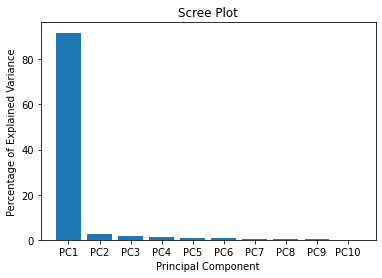

In [ ]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
np.round(pca.explained_variance_ratio_* 100, decimals=1)

array([91.8,  2.4,  1.8,  1.2,  0.9,  0.7,  0.5,  0.4,  0.4,  0. ])

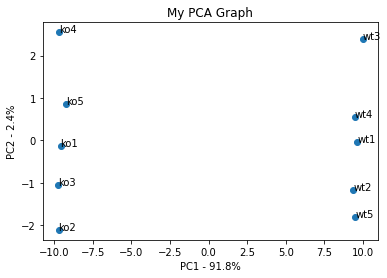

In [ ]:

#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

**Insight**



*   Secara umum data terdiri atas 2 cluster yaitu ko dan wt
*   Semakin jauh jarak titik observasi semakin jauh karakteristiknya
*   Nilai informasi yang ditangkap oleh visualisi diatas PC 1 sebesar 92.5%
 





# Determine which genes had the biggest influence on PC1

In [ ]:
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
loading_scores

gene1      0.057433
gene2      0.099547
gene3     -0.086863
gene4      0.098324
gene5      0.030129
             ...   
gene96     0.104107
gene97     0.103977
gene98    -0.101648
gene99     0.103878
gene100    0.100506
Length: 100, dtype: float64

Loading score menunjukkan nilai korelasi fitur terhadap PC, semakin besar loading score semakin memberi kontribusi yang besar terhadap PC

In [ ]:
## now sort the loading scores based on their magnitude (besar ke kecil)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
sorted_loading_scores

gene73    0.104303
gene9     0.104294
gene47    0.104265
gene43    0.104255
gene10    0.104244
            ...   
gene1     0.057433
gene18    0.055545
gene37    0.045410
gene5     0.030129
gene69    0.023695
Length: 100, dtype: float64

In [ ]:
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values

In [ ]:
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene73    0.104303
gene9    -0.104294
gene47    0.104265
gene43    0.104255
gene10   -0.104244
gene39    0.104238
gene74   -0.104237
gene90    0.104230
gene91    0.104228
gene70    0.104220
dtype: float64


10 variabel yang memberikan impact tertinggi pada PC

PCA bagian dari Unsupervised Learning

PCA dapat Melihat karakteristik data high dimensi



## Self Learning: Membuat PCA dengan data Iris yang telah dikenali sebelumnya